In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Linear Transformations ##

Linear transformations are both simple and ubiquitous: every time you change units of measurement, for example to standard units, you are performing a linear transformation.

### Linear Transformation: Exponential Density ###

Let $T$ have the exponential $(\lambda)$ distribution and let $T_1 = \lambda T$. Then $T_1$ is a linear transformation of $T$. Therefore

$$
E(T_1) = \lambda E(T) = 1 ~~~ \text{and} ~~~ SD(T_1) = \lambda SD(T) = 1
$$

The parameter $\lambda$ has disappeared in these results. Let's see how that follows from the distribution of $T_1$. The cdf of $T_1$ is 

$$
F_{T_1}(t) = P(T_1 \le t) = P(T \le t/\lambda) = 1 - e^{-\lambda (t/\lambda)}
= 1 - e^{-t}
$$

That's the cdf of the exponential $(1)$ distribution, consistent with the expectation and SD we found above.

To summarize, if $T$ has the exponential $(\lambda)$ distribution then the distribution of $T_1 = \lambda T$ is exponential $(1)$.

You can think of the exponential $(1)$ distribution as the fundamental member of the family of exponential distributions. All others in the family can be found by changing the scale of measurement, that is, by multiplying by a constant. 

If $T_1$ has the exponential $(1)$ distribution, then $T = \frac{1}{\lambda}T_1$ has the exponential $(\lambda)$ distribution. The factor $1/\lambda$ is called the *scale parameter*. 

Here are graphs of the densities of $T_1$ and $T = \frac{1}{2}T_1$. By the paragraph above, $T$ has the exponential $(2)$ distribution. 

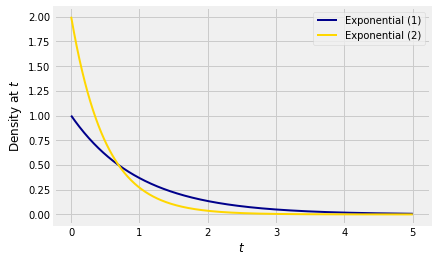

In [2]:
# NO CODE
t = np.arange(0, 5.01, 0.01)
t1 = stats.expon.pdf(t, scale = 1)
t2 = stats.expon.pdf(t, scale = 1/2)
plt.plot(t, t1, color='darkblue', lw=2, label='Exponential (1)')
plt.plot(t, t2, color='gold', lw=2, label='Exponential (2)')
plt.xlabel('$t$')
plt.ylabel('Density at $t$')
plt.legend();

The formulas for the two densities are

$$
f_{T_1} (s) = e^{-s} ~~~~~~~~~~~~~~ f_T(t) = 2e^{-2t}
$$

Let's try to understand the relation between these two densities in a way that will help us generalize what we are seeing in this example. 

The relation between the two random variables is $T = \frac{1}{2}T_1$.

- For any $t$, the chance that $T$ is near $t$ is the same as the chance that $T_1$ is near $s = 2t$. This explains the factor $e^{-2t}$ in the density of $T$.
- If we think of $T_1$ as a point on the horizontal axis, then to create $T$ you have to divide $T_1$ by $2$. So the transformation consists of halving all distances on the horizontal axis. The total area under the density of $T$ must equal $1$, so we have to compensate by doubling all distances on the vertical axis. This explains the factor $2$ in the density of $T$.

```{admonition} Quick Check
If $T$ is exponential $(\lambda)$ and $c > 0$, then $S = cT$ is exponential with one of the following rates. Which one?

$c\lambda$, $\frac{c}{\lambda}$, $\frac{\lambda}{c}$

```

```{admonition} Answer
:class: dropdown
$\frac{\lambda}{c}$

```

In [3]:
# VIDEO
from IPython.display import YouTubeVideo

YouTubeVideo('MA40E9QPCjU')

### Linear Change of Variable Formula for Densities ###
We use the same idea to find the density of a linear transformation of a random variable.

Let $X$ be a random variable with density $f_X$, and let $Y = aX + b$ for constants $a \ne 0$ and $b$. Let $f_Y$ be the density of $Y$. Then

$$
f_Y(y) ~ = ~ f_X\big{(} \frac{y-b}{a}\big{)} \frac{1}{\lvert a \rvert} 
$$

Let's take this formula in two pieces, as in the exponential example.
- For $Y$ to be $y$, $X$ has to be $(y-b)/a$.
- The linear function $y = ax+b$ involves multiplying distances along the horizontal axis by $\lvert a \rvert$; the sign of $a$ doesn't affect distances. To get a density, we have to compensate by dividing all vertical distances by $\lvert a \rvert$.

This is a good way to understand the formula, and will help you understand the corresponding formula for non-linear transformations.

For a formal proof, start with the case $a > 0$.

$$
F_Y(y) = P(aX+b \le y) = P\big{(}X \le \frac{y-b}{a}\big{)} = F_X\big{(}\frac{y-b}{a}\big{)}
$$

By the chain rule of differentiation,

$$
f_Y(y) = f_X\big{(}\frac{y-b}{a}\big{)} \cdot \frac{1}{a}
$$

If $a < 0$ then division by $a$ causes the direction of the inequality to switch:

$$
F_Y(y) = P(aX+b \le y) = P\big{(}X \ge \frac{y-b}{a}\big{)} = 1 - F_X\big{(}\frac{y-b}{a}\big{)}
$$

Now the chain rule yields

$$
f_Y(y) ~ = ~ -f_X\big{(}\frac{y-b}{a}\big{)} \cdot \frac{1}{a}
~ = ~ f_X\big{(}\frac{y-b}{a}\big{)} \cdot \frac{1}{\lvert a \rvert}
$$

```{admonition} Quick Check
$V$ has density $f$ on the whole real line.

(a) Write the density of $W = 5 + 3V$ in terms of $f$.

(b) Write the density of $W = 5 - 3V$ in terms of $f$.

```

```{admonition} Answer
:class: dropdown
(a) For all $w$, $f_W(w) = f\big{(}\frac{w-5}{3}\big{)}\cdot\frac{1}{3}$

(b) For all $w$, $f_W(w) = f\big{(}\frac{w-5}{-3}\big{)}\cdot\frac{1}{3}$

```

### The Normal Densities ###
Let $Z$ have the standard normal density 

$$
\phi(z) ~ = ~ \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}, ~~~ -\infty < z < 
\infty
$$

Let $X = \sigma Z + \mu$ for constants $\mu$ and $\sigma$ with $\sigma > 0$. Then for any real number $x$, the density of $X$ is

$$
\begin{align*}
f_X(x) ~ &= ~ \phi\big{(} \frac{x-\mu}{\sigma} \big{)} \frac{1}{\sigma} \\ \\
&= ~ \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2} \big{(} \frac{x-\mu}{\sigma} \big{)}^2} 
\end{align*}
$$

Thus every normal random variable is a linear transformation of a standard normal variable. 

```{admonition} Quick Check
Let $X$ have the normal distribution with mean $0$ and variance $90$. Write $X$ as a linear function of a standard normal random variable.

```

```{admonition} Answer
:class: dropdown
$X = \sqrt{90}Z$ where $Z$ is $X$ in standard units and hence standard normal

```

### The Uniform Densities, Revisited ###
Let the distribution of $U$ be uniform on $(0, 1)$ and for constants $b > a$ let $V = (b-a)U + a$. In an earlier section we saw that $V$ has the uniform distribution on $(a, b)$. But let's see what's involved in confirming that result using our new formula.

First it is a good idea to be clear about the possible values of $V$. Since the possible values of $U$ are in $(0, 1)$, the possible values of $V$ are in $(a, b)$.

At $v \in (a, b)$, the density of $V$ is

$$
f_V(v) ~ = ~ f_U\big{(} \frac{v - a}{b-a} \big{)} \frac{1}{b-a} ~ = ~
1 \cdot \frac{1}{b-a} ~ = ~ \frac{1}{b-a}
$$

That's the uniform density on $(a, b)$.